In [52]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np

Task1

part 1a

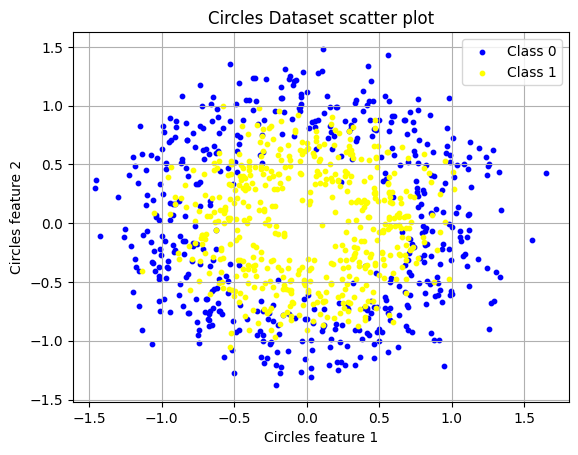

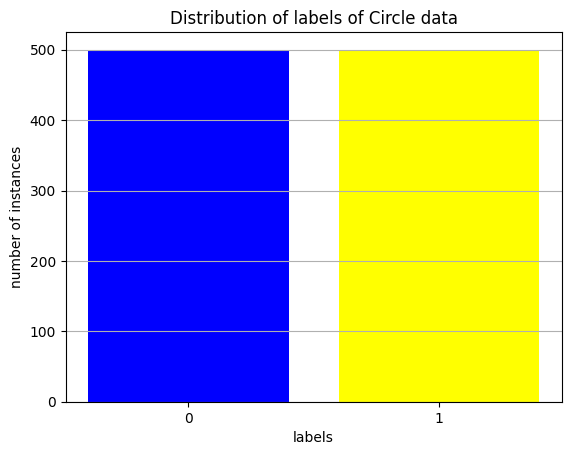

Mean and standard deviation of circles dataset
Mean : [ 0.00244319 -0.00251676]
Standard deviation: [0.6158258  0.61647738]


In [53]:
#Note that from the scikit learn website, the module makecircles does not have an'inputs=2' option.
#If 'inputs=2' simply means that the dimension of the features should be 2, then this behaviour is default.
#All information was taken from this website https://scikit-learn.org/stable/api/sklearn.html.

j_samples = 1000

circles_X,circles_y = make_circles(n_samples=j_samples, random_state=0, noise=0.2, factor=0.6)

#Information about plotting was taken from https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
#Note that in order to colour the points with class 0 as blue and class 1 as yellow, the data was plotted in two parts.
#Where the expression 'circles_X[circles_y == 0, 0], circles_X[circles_y == 0, 1]' simply plots the points that have class 0 on the graph;
#Where the x and y axis are the input features.
#This was done for both blobs and circles.

plt.figure()
plt.scatter(circles_X[circles_y == 0, 0], circles_X[circles_y == 0, 1], color='blue', s=10, label="Class 0")
plt.scatter(circles_X[circles_y == 1, 0], circles_X[circles_y == 1, 1], color='yellow', s=10, label="Class 1")
plt.xlabel("Circles feature 1")
plt.ylabel("Circles feature 2")
plt.title("Circles Dataset scatter plot")
plt.legend()
plt.grid(True)
plt.show


#The distribution of the output labels is represented by a bar chart.
#Where the blue bar represents the number of points of class 0 and the yellow bar represents the number of points of class 1

dist_circles = [np.sum(circles_y==0), np.sum(circles_y == 1)]

plt.figure()
plt.grid(axis='y')
plt.bar([0,1], dist_circles, color = ['blue', 'yellow'])
plt.xlabel('labels')
plt.ylabel('number of instances')
plt.xticks([0, 1])
plt.title('Distribution of labels of Circle data')
plt.show()



#The mean and standard deviation were simply calculated using the standard numpy functions taken from the numpy website https://numpy.org/doc/2.2/reference/routines.statistics.html

mean_circles_X = np.mean(circles_X, axis=0)
variance_circles_X = np.var(circles_X, axis=0)

print("Mean and standard deviation of circles dataset")
print("Mean :",  mean_circles_X)
print("Standard deviation:", np.sqrt(variance_circles_X))



part 1b

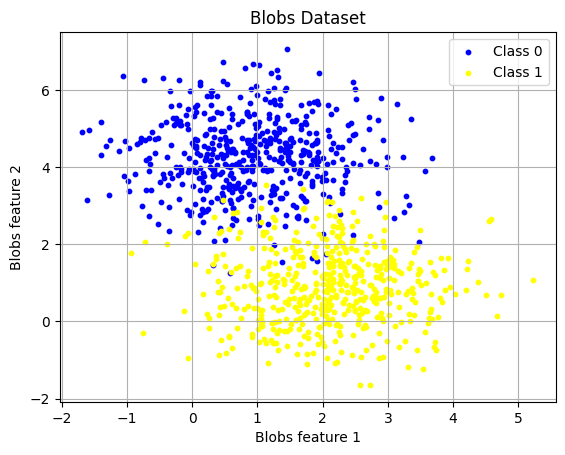

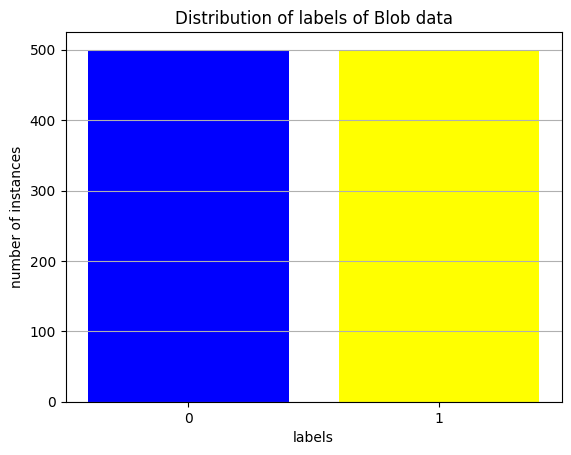

Mean and standard deviation of Blob dataset
Mean : [1.48980274 2.58551082]
Standard deviation: [1.13433172 1.95390043]


In [54]:
#The same websites and tools were used for this part of the question.

blobs_X,blobs_y = make_blobs(n_samples=j_samples,centers=2, cluster_std=1.0, n_features=2, random_state=0)

plt.figure()
plt.scatter(blobs_X[blobs_y == 0, 0], blobs_X[blobs_y == 0, 1], color='blue', s=10, label="Class 0")
plt.scatter(blobs_X[blobs_y == 1, 0], blobs_X[blobs_y == 1, 1], color='yellow', s=10, label="Class 1")
plt.xlabel("Blobs feature 1")
plt.ylabel("Blobs feature 2")
plt.title("Blobs Dataset")
plt.legend()
plt.grid(True)
plt.show

dist_blobs = [np.sum(blobs_y==0), np.sum(blobs_y == 1)]

plt.figure()
plt.grid(axis='y')
plt.bar([0,1], dist_blobs, color = ['blue', 'yellow'])
plt.xlabel('labels')
plt.ylabel('number of instances')
plt.xticks([0, 1])
plt.title('Distribution of labels of Blob data')
plt.show()

mean_blobs_X = np.mean(blobs_X, axis=0)
variance_blobs_X = np.var(blobs_X, axis=0)
print("Mean and standard deviation of Blob dataset")
print("Mean :",  mean_blobs_X)  
print("Standard deviation:", np.sqrt(variance_blobs_X))

Task 2

part 2a

After searching up the best way to shuffle an array the Fisher-Yates Algorithm was the best result found. The wikipedia page was used to understand how it is done, and the rest of the implementation was done from scratch.

The algorithm simply works by looping through the array starting from the last element.
Then, it generates a random number from 0 to the current index of the for loop.
Then, it swaps the elements given by the current index of the for loop and the randomly generated index.
This algorithm is supposed to give equal probability to all possible permutations of the array while having O(n) complexity

https://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle#:~:text=The%20Fisher%E2%80%93Yates%20shuffle%2C%20also,list%20until%20no%20elements%20remain.


In [55]:
#The function takes in two arrays X and Y, were X is the n-d array of datapoints, and Y is the array of X's respective labels
#It also takes the split value which is supposed to be the percentage of the data to be given to training

def reshuffle_split(X,Y, split_training) :
    if(split_training >100 or split_training<0):
        split_training = 80

#The Fisher-Yates algorithm is being implemented to gain a random permutation of the data
    for last_index in range(len(X)-1, 0, -1):  
        swap_index = np.random.randint(0, last_index+1)
        X[last_index], X[swap_index] = X[swap_index], X[last_index]
        Y[last_index], Y[swap_index] = Y[swap_index], Y[last_index ]
        
    #using array slicing, we are splitting the X and Y values into training and testing arrays.
    # Where W represents training and Z represents testing
    split_index = int(np.ceil(((split_training*(len(X)-1))/100)))
    W1 = X[:split_index].copy()
    W2 = Y[:split_index].copy()
    Z1 = X[split_index:].copy()
    Z2 = Y[split_index:].copy()
    return W1,W2,Z1,Z2




Below is a short test of the reshuffle_split(X,Y,split_training) function with two arrays of size 10; one representing data points, the other representing labels.

This test shows that the required behaviour is being executed; since the arrays are being shuffled into a random permutations.
Where the X and Y arrays are shuffled in parallel, meaning the data points retain their labels.

Additionally, the arrays are being split up into two parts according to the percentage given. In this case 80% was given, so the arrays should be split up into one array of 8 values and one array of 2 values, which is what the output shows.

Note that the arrays given to the function are being shuffled, and the sub arrays are deep copies of the given arrays, which is the intended behaviour.

In [56]:
test_x = [1,2,3,4,5,6,7,8,9,10]
test_y = [0,0,0,0,0,1,1,1,1,1]
print("Ordered array x_values and respective labels: ", test_x, test_y)
print("\n")
W1,W2,Z1,Z2 = reshuffle_split(test_x, test_y, 80)
print("Shuffled array x_values and respective labels: ", test_x, test_y)
print("\n")
print("Shuffled and split arrays, x_values and respective labels: ",W1,W2, "\n", Z1,Z2)


Ordered array x_values and respective labels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


Shuffled array x_values and respective labels:  [3, 4, 5, 10, 2, 7, 1, 8, 6, 9] [0, 0, 0, 1, 0, 1, 0, 1, 1, 1]


Shuffled and split arrays, x_values and respective labels:  [3, 4, 5, 10, 2, 7, 1, 8] [0, 0, 0, 1, 0, 1, 0, 1] 
 [6, 9] [1, 1]


Part 2b

The formulae for the metrics required are as follows:
classification accuracy = (TP+TN)/(Total number of predictions)
recall = TP /(TP + FN)
precision = TP/(TP + FP)
F1-score =2*(recall*precision)/(recall+precision)

Where :
TP = true positives (the model predicted 1, and the actual test data had value 1)
TN = true negative (model = 0, data = 0)
FP = false positive (model = 1, data = 0)
FN = false negative (model = 0, data = 1)

The function below will take in two arrays of labels of the same size, where the first array contains the actual test data labels, and the second array contains the predicted labels using the model.

It Then loops through both arrays and calculates TP, TN, FP and FN, by simply comparing the values.

The required metrics are then calculated. Note that if the denominator is 0 in any of the metrics, the metric is set to 0.


In [57]:
def get_accuracy_measures(data, model_prediction):

    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(data)) : 
        if int(data[i]) == int(model_prediction[i]) :
            if int(data[i]) ==0 :
                tn+=1
            else :
                tp+=1
        if int(data[i]) !=int( model_prediction[i]):
            if int(data[i]) ==0 :
                fp +=1
            else :
                fn+=1
    
    classification_accuracy = ((tn+tp)/(len(data)))

    if tp+fn == 0 :
        recall = 0
    else : 
        recall = tp/(tp+fn)

    if tp+fp == 0 :
        precision = 0
    else : 
       precision = tp/(tp+fp)
    
    if precision+recall == 0 :
        F1_score = 0
    else : 
        F1_score = 2*(precision*recall)/(precision+recall)

    return [classification_accuracy, recall, precision, F1_score]



Below is a unit test function to check if the scores are really working. 
Two test arrays of dummy data will be hardcoded, and they will be small so that the answer may be corroborated by hand.

In [58]:
#dummy data

data = [0,1,0,1,1,1,0,1,0,0]
model = [1,0,0,1,1,0,0,0,1,0]

#The expected answers are as follows:
#TP = 2, TN = 3, FP = 2, FN = 3 => [accuracy, recall. precision, F1_score] = [1/2,2/5, 1/2,4/9] = [0.5,0.4,0.5,0.44444444...]

print(" [accuracy, recall. precision, F1_score] = ", get_accuracy_measures(data,model))



 [accuracy, recall. precision, F1_score] =  [0.5, 0.4, 0.5, 0.4444444444444445]


The results are as expected.

Task 3

Task 3a

In [59]:
#Uses the data in task 1 to split into training and testing
circles_train_data_X, circles_train_data_y, circles_test_data_X, circles_test_data_y = reshuffle_split(circles_X,circles_y, 80)
blobs_train_data_X, blobs_train_data_y, blobs_test_data_X, blobs_test_data_y = reshuffle_split(blobs_X,blobs_y, 80)

Task 3b and 3c combined :

The function best_k_f1_and_accuracy takes a data set and splits into 80-20 split for training and testing, using the function in task 2a.

Then it loops through all possible values of k, and trains a model on the training set with the current value of K in the loop.

Then the predicitions of the model for the test data are calculated.

Then using the function in task 2b, the metrics of the model's predictions are extracted and compared to the current best F1 score and accuracy score.

Finally the function compares the best scores to the current model's scores, and stores [k, f1-score] and [k, accuracy score] of whichever model had the greatest scores.

This is done for both circles and blobs datasets.

In [60]:
from sklearn.neighbors import KNeighborsClassifier


def best_k_f1_and_accuracy(circles_data_X, circles_data_y,  blob_data_X, blob_data_y):

    #splits the data into training and testing

    circles_train_data_subset_X, circles_trian_data_subset_y, circles_test_data_subset_X, circles_test_data_subset_y = reshuffle_split(circles_data_X,circles_data_y, 80)
    blobs_train_data_subset_X, blobs_trian_data_subset_y, blobs_test_data_subset_X, blobs_test_data_subset_y = reshuffle_split(blob_data_X, blob_data_y, 80)
    
    #initialises the pair [best k, corresponding score] for both the f1 score and accuracy score, and in turn for both circles and blobs.
    #Note that the scores are set to -1 so that they are smaller than any other score and will be switched with the first scores compared.
    

    best_k_circles_F1 = [-1,-1]
    best_k_blobs_F1 = [-1,-1]
    best_k_circles_accuracy = [-1,-1]
    best_k_blobs_accuracy = [-1,-1]
    
    #loops through all possible values of k

    max_k = len(circles_train_data_subset_X)

    for k_neighbours in range(1, max_k):

        #training the models based in the training data

        circles_knn_model = KNeighborsClassifier(n_neighbors= k_neighbours)
        circles_knn_model.fit(circles_train_data_subset_X, circles_trian_data_subset_y)

        blobs_knn_model = KNeighborsClassifier(n_neighbors=k_neighbours)
        blobs_knn_model.fit(blobs_train_data_subset_X, blobs_trian_data_subset_y)

        #Storing the predicitons for the test data

        circles_test_data_predictions = circles_knn_model.predict(circles_test_data_subset_X)
        blobs_test_data_predictions = blobs_knn_model.predict(blobs_test_data_subset_X)

        #Using the function in task 2b to obtain the F1_score and classification accuracy
        #Note that the F1-score is circles_accuracy_measures[3] and the accuracy score is circles_accuracy_measures[0]
        #The same applies for the blobs F1-score and the accuracy

        circles_accuracy_measures = get_accuracy_measures(circles_test_data_subset_y, circles_test_data_predictions)
        blobs_accuracy_measures = get_accuracy_measures(blobs_test_data_subset_y, blobs_test_data_predictions)

        #Comparing all the metrics and storing the best one.
        
        if circles_accuracy_measures[3]> best_k_circles_F1[1] :
            best_k_circles_F1[0] = k_neighbours
            best_k_circles_F1[1] = circles_accuracy_measures[3]

        if blobs_accuracy_measures[3]> best_k_blobs_F1[1] :
            best_k_blobs_F1[0] = k_neighbours
            best_k_blobs_F1[1] = blobs_accuracy_measures[3]

        if circles_accuracy_measures[0]> best_k_circles_accuracy[1] :
            best_k_circles_accuracy[0] = k_neighbours
            best_k_circles_accuracy[1] = circles_accuracy_measures[0]

        if blobs_accuracy_measures[0]> best_k_blobs_accuracy[1] :
            best_k_blobs_accuracy[0] = k_neighbours
            best_k_blobs_accuracy[1] = blobs_accuracy_measures[0]

    
    return best_k_circles_F1, best_k_blobs_F1, best_k_circles_accuracy, best_k_blobs_accuracy


Below, the training data obtained in part 3a is being given to the function developed above, to obtain the best k for the different datasets.
Note that the test data obtained in part 3a is still unused and would theoretically be used to further test the model.
In this case it was simply used to check whether the best k found for both accuracy and F1.

In [61]:
k_circles_F1, k_blobs_F1,k_circles_accuracy, k_blobs_accuracy = best_k_f1_and_accuracy(circles_train_data_X,
                                                                                        circles_train_data_y,
                                                                                          blobs_train_data_X,
                                                                                            blobs_train_data_y)
print("[Best k for F1-score for circles, corresponding f1-score] = ",
       k_circles_F1,"\n[Best k for F1-score for blobs, corresponding f1-score] = " ,
         k_blobs_F1, "\n[Best k for accuracy for circles, corresponding accuracy score] = ",
         k_circles_accuracy,"\n[Best k for accuracy for blobs, corresponding accuracy score] = " , k_blobs_accuracy )

[Best k for F1-score for circles, corresponding f1-score] =  [94, 0.6847826086956522] 
[Best k for F1-score for blobs, corresponding f1-score] =  [405, 0.654320987654321] 
[Best k for accuracy for circles, corresponding accuracy score] =  [66, 0.64375] 
[Best k for accuracy for blobs, corresponding accuracy score] =  [328, 0.65]


Below, a KNN model is being created with the previously found best k for accuracy and for F1-score.

It can be seen that some of the scores are somewhat lower than what the best_k function claimed it to be. This is probably due to overfitting the value of k to the randomly shuffled dataset in the function.


In [62]:
test_model_3_circles = KNeighborsClassifier(n_neighbors=k_circles_F1[0])
test_model_3_circles.fit(circles_train_data_X, circles_train_data_y)
test_model_3_blobs = KNeighborsClassifier(n_neighbors=k_blobs_F1[0])
test_model_3_blobs.fit(blobs_train_data_X, blobs_train_data_y)

print("F1-score test with best k, circles :", get_accuracy_measures(circles_test_data_y, test_model_3_circles.predict(circles_test_data_X))[3])
print("F1-score test with best k, blobs :", get_accuracy_measures(blobs_test_data_y, test_model_3_blobs.predict(blobs_test_data_X))[3])

test_model_3_circles = KNeighborsClassifier(n_neighbors=k_circles_accuracy[0])
test_model_3_circles.fit(circles_train_data_X, circles_train_data_y)
test_model_3_blobs = KNeighborsClassifier(n_neighbors=k_blobs_accuracy[0])
test_model_3_blobs.fit(blobs_train_data_X, blobs_train_data_y)

print("accuracy test with best k, circles :", get_accuracy_measures(circles_test_data_y, test_model_3_circles.predict(circles_test_data_X))[0])
print("accuracy test with best k, blobs :", get_accuracy_measures(blobs_test_data_y, test_model_3_blobs.predict(blobs_test_data_X))[0])


F1-score test with best k, circles : 0.6572769953051643
F1-score test with best k, blobs : 0.9246231155778896
accuracy test with best k, circles : 0.625
accuracy test with best k, blobs : 0.91


Task 4

part 4a

Below is a step-by-step description of the computational experiment designed to compare the time complexity of th kdtree and brute algorithms:

Firstly the maximum size and minimum size of the varying training sets will be decided(train_max and train_min). In order to keep it generic these shall be variables that can simply have their values changed at the beginning.

Since the test set must remain of constant size to ensure a fair comparison is made between models for prediction time, the test set size(test_n) will be set as a variable in the begininning that can easily be changed. Note that the test size is declared as 20 percent of the smallest training size.

It must be observed that the amount of time it takes for the brute force algorithm and the kdtree algorithm to predict the label of a sample depends on the value of k. So the value of k does not matter in this particular test since we are comparing time complexities relatively and not testing for accuracy. This means k can be set to some arbitrary number or scaled with the data set as long as the same k is used for both algorithms. The larger k the longer the algorithm will take, so for simplicity we will take log(number of training data points) so that k does not grow too large, and cause the algorithm to take too long.

Then using the makecircles and makeblobs function, we create (train_max+test_n) data points, and (test_n) of these points will be stored for testing, while the rest will be used to train the models.

Then an array of all the different training sizes will be made (train_set_data_sizes), and for simplicity a simple array starting from value train_min up to train_max in increments of delta will be used. Note that delta must be an integer such that train_max = train_min + m*delta where m is a natural number.

Then an array of the same length as train_set_data_sizes will be made, and will be initialsed to 0. This array will store the time taken to predict the labels for the fixed test data set, for each model. ( it will be named depending on whether it is for the kd-tree or brute search algorithm.)

Then a for loop will go through all the values of train_set_data_sizes.
At stage i, a model for each algorithm (kd tree and brute) will be created based on the first 0 to train_set_data_sizes[i] data points in the training dataset and then the time it takes for the models to predict the fixed test data points will be measured and stored in their respective arrays.

Finally this data will be plotted, where the x axis contains the values from train_set_data_sizes, and the y axis will contain the values obtained for the time taken to predict the test values, based on the kd-tree and the brute-force algorithms. (These values were obtained in the for loop)

Note that this will be done for both blobs and circles in a identical manner.

Also, note that the time module was used and taken from https://docs.python.org/3/library/time.html#functions

Goals :
To compare the amount of process time taken by the two different algorithms in the prediction phase on a fixed number of test samples, for varying training set sizes.

Metrics used to measure:

time.perf_counter() is used to count the time in seconds for the different models to predict the testing set data.
The values of these times are held in an array in parallel to the array of different training sizes.



Part 4b

The algorithm for the process being described in 4a is implemented below

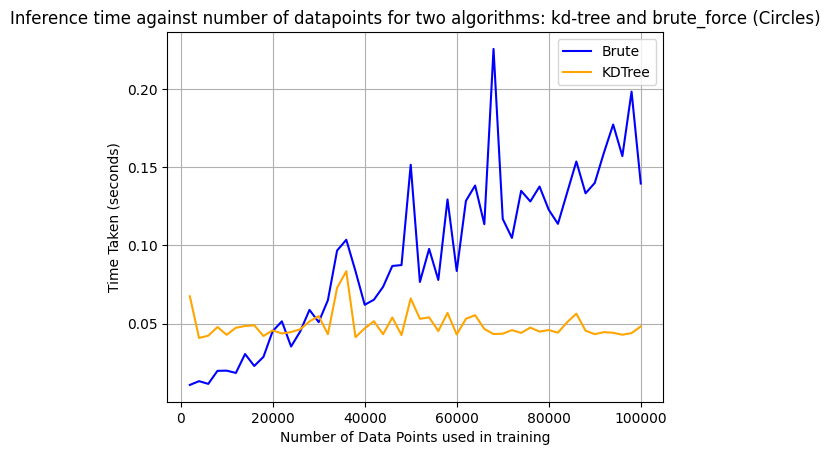

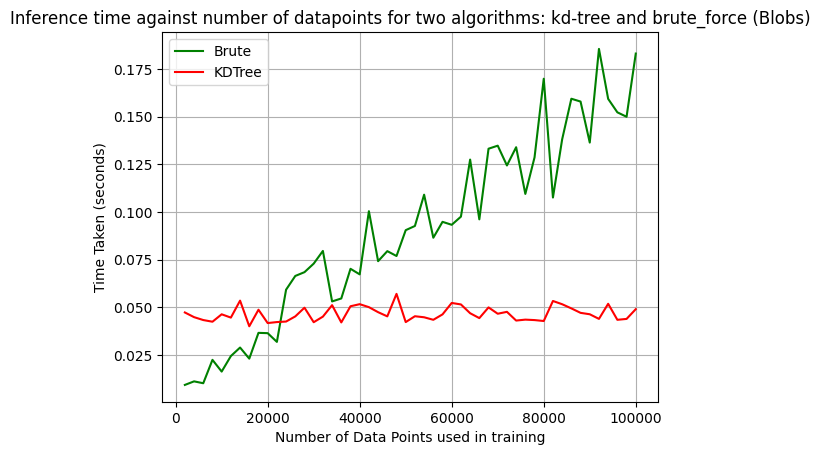

In [ ]:
import time

train_max = 100000
train_min = 2000
test_n = 500
delta = 2000

X1,y1 = make_circles(n_samples=train_max+test_n, random_state=0, noise=0.2, factor=0.6)
X2,y2 = make_blobs(n_samples=train_max+test_n,centers=2, cluster_std=1.0, n_features=2, random_state=0)


train_set_data_sizes = np.arange(train_min, train_max+delta, delta)

time_taken_brute_circles = np.zeros_like(train_set_data_sizes, dtype= float)
time_taken_kdtree_circles = np.zeros_like(train_set_data_sizes, dtype= float)
time_taken_brute_blobs = np.zeros_like(train_set_data_sizes, dtype= float)
time_taken_kdtree_blobs = np.zeros_like(train_set_data_sizes, dtype= float)

circles_test_data_X = X1[:test_n].copy()
blobs_test_data_X = X2[:test_n].copy()


X1 = X1[test_n:]
y1 = y1[test_n:]
X2 = X2[test_n:]
y2 = y2[test_n:]

for i in range(len(train_set_data_sizes)):

    #k is set to scale up with the number of training samples, however it does not really affect the answer
     
    k = int(np.log2(train_set_data_sizes[i]))

    brute_knn_circles = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    kdtree_knn_circles = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')

    brute_knn_blobs = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    kdtree_knn_blobs = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')

    brute_knn_circles.fit(X1[:train_set_data_sizes[i]], y1[:train_set_data_sizes[i]])
    kdtree_knn_circles.fit(X1[:train_set_data_sizes[i]], y1[:train_set_data_sizes[i]])
    brute_knn_blobs.fit(X2[:train_set_data_sizes[i]], y2[:train_set_data_sizes[i]])
    kdtree_knn_blobs.fit(X2[:train_set_data_sizes[i]], y2[:train_set_data_sizes[i]])

    start_time = time.perf_counter()
    brute_knn_circles.predict(circles_test_data_X)
    end_time = time.perf_counter()
    time_taken_brute_circles[i] = end_time - start_time
    
   
    start_time = time.perf_counter()
    kdtree_knn_circles.predict(circles_test_data_X)
    end_time = time.perf_counter()
    time_taken_kdtree_circles[i] = end_time - start_time
    
   
    start_time = time.perf_counter()
    brute_knn_blobs.predict(blobs_test_data_X)
    end_time = time.perf_counter()
    time_taken_brute_blobs[i] = end_time - start_time
    
    
    start_time = time.perf_counter()
    kdtree_knn_blobs.predict(blobs_test_data_X)
    end_time = time.perf_counter()
    time_taken_kdtree_blobs[i] = end_time - start_time

plt.figure()
plt.plot(train_set_data_sizes, time_taken_brute_circles, label='Brute', color='blue')
plt.plot(train_set_data_sizes, time_taken_kdtree_circles, label='KDTree', color='orange')
plt.title('Inference time against number of datapoints for two algorithms: kd-tree and brute_force (Circles)')
plt.xlabel('Number of Data Points used in training')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(train_set_data_sizes, time_taken_brute_blobs, label='Brute', color='green')
plt.plot(train_set_data_sizes, time_taken_kdtree_blobs, label='KDTree', color='red')
plt.title('Inference time against number of datapoints for two algorithms: kd-tree and brute_force (Blobs)')
plt.xlabel('Number of Data Points used in training')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()




part 4c


Theoretically the kd tree is supposed to be increasing logarithmacially depending on the number of inputs, and the brute force is supposed to be increasing linearly.

More specifically, the kd-tree search gives better performance over brute-force search as the dataset size increases. This efficiency is due to the tree's ability to prune large portions of the search space, significantly reducing the number of distance computations required. This happens during traversal, when subtrees that cannot possibly contain a closer point than the current best can be skipped, which means that far less distances have to be calculated as the number of points grows.

However, for small datasets, the overhead introduced by the kd-tree (eg : recursive traversal and backtracking) can slow down its benefits. In such cases, the brute-force method, which directly computes the distances, is faster.

The results reflect this to a considerable degree, since it can be observed that as the number of data points increases, the brute force algorithm seems to be increasing linearly with no huge jumps, eventhough from one point to the next it may not always be increasing.
While the kdtree, seems to be remaining constant throughout.(which is what is expected of a log(N) graph, since when N is large,the increase is so small that it seems to be constant)

Note that the graph is far from smooth due to errors and inaccuracies in the test and when measuring time.

Some of the sources of errors could be:

Unknown compiler and cpu optimizations during execution may be speeding up or slowing down certain parts of the execution, which makes the timing unfair.

The timing is not accounting for how much time the OS-kernel is actually allocating for the process itself, so interrupts and different process scheduling algorithms may affect the total time taken.



If we look at the graphs of y = x and y = ln(x), it may be observed that a similar behaviour to that observed in the experiment should be expected.

This behaviour is due to the fact that at a small number of points ln(cx) > x, but as x increases, ln(cx) < x, where c>1. (Note that a constant c was chosen because ln(x) and x do not even intersect, but real-world time complexities are not always perfect, so some c>1 was chosen to emulate the real world and make the graphs intersect).

Note that the choice of c does not influence the fact that ln(x) will always be lower than x after a certain point so long as c>0, so c =10 was chosen simply for illustration purposes


Below is a plot to illustrate this fact.

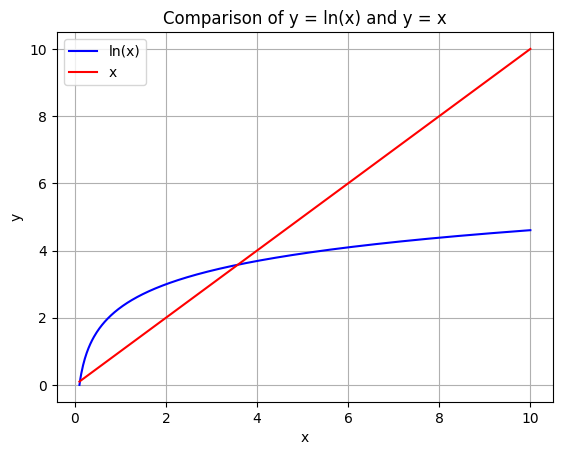

In [64]:


x = np.linspace(0.1, 10, 500)
y_ln = np.log(10*x)
y_x = x

plt.plot(x, y_ln, label='ln(x)', color='blue')
plt.plot(x, y_x, label='x', color='red')
plt.title('Comparison of y = ln(x) and y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In conclusion, it can be observed that the test results do in fact match the expected output.
That is to say that at small training set sizes, the brute force algorithm is more efficient at predicting, but as the training set increases, the kdtree algorithm is preferred.